In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

Using TensorFlow backend.


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
np.random.seed(7)

In [7]:
ankledata = pd.read_csv(r"/home/gaurav/Desktop/biped data/ankleAngles.csv", usecols=[1], names=['ankleData'])

In [8]:
ankledata.shape

(6489, 1)

In [9]:
ankledata.head()

,ankleData
0,-0.436332
1,-0.436332
2,-0.436332
3,-0.436332
4,-0.436332


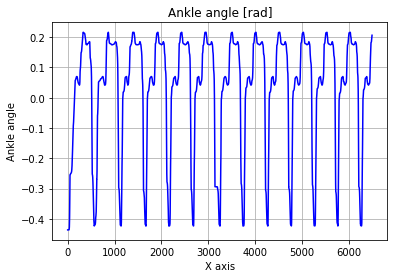

In [10]:
plt.plot(ankledata, color='blue')
plt.title('Ankle angle [rad]')
plt.xlabel('X axis')
plt.ylabel('Ankle angle')
plt.grid(True)
plt.show()

In [11]:
dataset = ankledata.values
dataset = dataset.astype('float32')

In [12]:
#Normalize the data set using MinMaxScaler scikit learn library
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [13]:
#split the dataset into train and test case
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size

In [14]:
train_size, test_size

(4347, 2142)

In [15]:
train = dataset[:train_size,:]
test = dataset[train_size:len(dataset),:]

In [16]:
def create_dataset(dataset, lookback=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookback-1):
        a = dataset[i:(i+lookback),0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)

In [17]:
lookback = 50
trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)

In [18]:
#Reshape input data to [samples, timesteps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
model = Sequential()
model.add(LSTM(10, input_shape=(1,lookback)))
model.add(Dense(1))
model.add(Activation('tanh'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 24s - loss: 0.0054
Epoch 2/50
 - 22s - loss: 0.0024
Epoch 3/50
 - 23s - loss: 0.0019
Epoch 4/50
 - 23s - loss: 0.0016
Epoch 5/50
 - 22s - loss: 0.0015
Epoch 6/50
 - 23s - loss: 0.0013
Epoch 7/50
 - 26s - loss: 0.0012
Epoch 8/50
 - 12s - loss: 0.0011
Epoch 9/50
 - 12s - loss: 9.8994e-04
Epoch 10/50
 - 12s - loss: 8.7437e-04
Epoch 11/50
 - 12s - loss: 8.4947e-04
Epoch 12/50
 - 13s - loss: 8.3248e-04
Epoch 13/50
 - 11s - loss: 7.8364e-04
Epoch 14/50
 - 11s - loss: 7.2897e-04
Epoch 15/50
 - 11s - loss: 6.3748e-04
Epoch 16/50
 - 12s - loss: 6.4113e-04
Epoch 17/50
 - 11s - loss: 5.6298e-04
Epoch 18/50
 - 11s - loss: 5.4291e-04
Epoch 19/50
 - 12s - loss: 5.5631e-04
Epoch 20/50
 - 12s - loss: 5.3261e-04
Epoch 21/50
 - 12s - loss: 5.1885e-04
Epoch 22/50
 - 11s - loss: 4.8053e-04
Epoch 23/50
 - 11s - loss: 4.6672e-04
Epoch 24/50
 - 11s - loss: 5.0197e-04
Epoch 25/50
 - 13s - loss: 4.8586e-04
Epoch 26/50
 - 12s - loss: 4.1499e-04
Epoch 27/50
 - 13s - loss: 4.5236e-04
Epoch 28/50
 - 

In [21]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [25]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [33]:
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform([testY])

In [34]:
trainPredict.shape, testPredict.shape

((4296, 1), (2091, 1))

In [35]:
trainY.shape, testY.shape

((1, 4296), (1, 2091))

In [36]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test score: %.2f RMSE' %(testScore))

Train Score: 0.48 RMSE
Test score: 0.46 RMSE


In [37]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict

In [38]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict

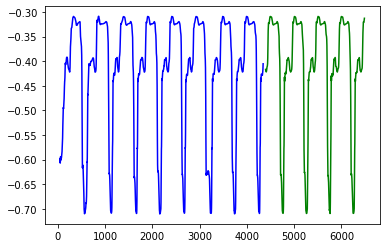

In [40]:
#plt.plot(scaler.inverse_transform(dataset), color='red')
#plt.plot(ankledata)
plt.plot(trainPredictPlot, color='blue')
plt.plot(testPredictPlot, color='green')